In [339]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [20]:
df = pd.read_csv('df_final.csv')

In [21]:
df.head()

,bookID,title,average_rating,num_pages,ratings_count,text_reviews_count,publication_date,publisher,language,author,genre,description
0,1,Harry Potter and the Half-Blood Prince (Harry ...,4.57,652,2095690,27591,2006-09-16,Scholastic,English,J.K. Rowling,Fantasy,"It is the middle of the summer, but there is a..."
1,2,Harry Potter and the Order of the Phoenix (Har...,4.49,870,2153167,29221,2004-09-01,Scholastic,English,J.K. Rowling,Fantasy,Harry Potter is about to start his fifth year ...
2,4,Harry Potter and the Chamber of Secrets (Harry...,4.42,352,6333,244,2003-11-01,Scholastic,English,J.K. Rowling,Fantasy,The Dursleys were so mean and hideous that sum...
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,4.56,435,2339585,36325,2004-05-01,Scholastic,English,J.K. Rowling,Fantasy,"Harry Potter, along with his best friends, Ron..."
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,4.78,2690,41428,164,2004-09-13,Scholastic,English,J.K. Rowling,Fantasy,Box Set containing Harry Potter and the Sorcer...


In [ ]:
# Checking counts and unique values in the target variable (genre).
pd.set_option('display.max_rows', None)
print(df["genre"].value_counts())
pd.set_option('display.max_rows', 25)

In [23]:
# Removing books without genre.
df = df[df["description"] != "blank"]
df = df[df["genre"] != "blank"]
# Removing NaN descriptions.
df = df[df["description"].notna()]

In [24]:
# 94 percent of the books are in English.
df["language"].value_counts()
# Filtering books only in English.
df = df[df["language"] == "English"]
df["language"].value_counts()

English    10039
Name: language, dtype: int64

In [25]:
# Only keep the required columns for the model. Call it df_m (dataFrame model).
df_m=df[["bookID","genre","description"]]
df_m

,bookID,genre,description
0,1,Fantasy,"It is the middle of the summer, but there is a..."
1,2,Fantasy,Harry Potter is about to start his fifth year ...
2,4,Fantasy,The Dursleys were so mean and hideous that sum...
3,5,Fantasy,"Harry Potter, along with his best friends, Ron..."
4,8,Fantasy,Box Set containing Harry Potter and the Sorcer...
...,...,...,...
11117,45630,Fiction,From the acclaimed author of The Rainbow Stori...
11118,45631,Fiction,William T. Vollmann is one of our greatest liv...
11119,45633,Fiction,"In the jungles of South America, on the ice fi..."
11120,45634,Historical Fiction,The time is the tenth century A.D. The newcome...


In [342]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10039 entries, 0 to 11121
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   bookID       10039 non-null  int64 
 1   genre        10039 non-null  object
 2   description  10039 non-null  object
 3   length       10039 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 392.1+ KB


In [343]:
df_m['length'] = list(map(lambda x: len(str(x).split()), df_m['description']))

In [344]:
df_m["length"].describe()

count    10039.000000
mean       134.939536
std         87.432690
min          1.000000
25%         75.500000
50%        120.000000
75%        172.000000
max       1289.000000
Name: length, dtype: float64

<AxesSubplot: xlabel='length', ylabel='Count'>

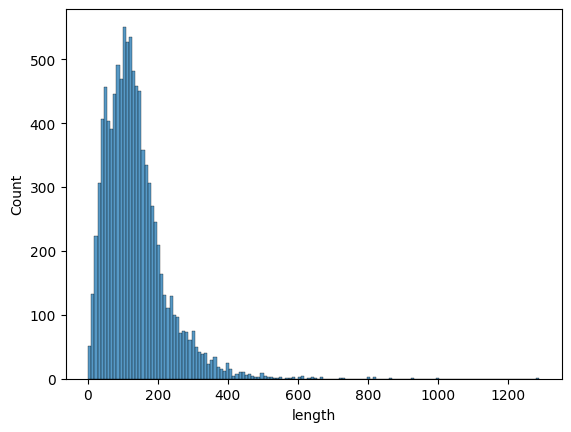

In [345]:
sns.histplot(x=df_m['length'])

In [346]:
# Checking if we are in need of filtering the descriptions by length.
df_m[df_m["length"] < 25]
# For now I keep all of them.
# Drop the length column because not needed anymore after filtering.
df_m.drop("length", axis=1)

,bookID,genre,description
0,1,Fantasy,"It is the middle of the summer, but there is a..."
1,2,Fantasy,Harry Potter is about to start his fifth year ...
2,4,Fantasy,The Dursleys were so mean and hideous that sum...
3,5,Fantasy,"Harry Potter, along with his best friends, Ron..."
4,8,Fantasy,Box Set containing Harry Potter and the Sorcer...
...,...,...,...
11117,45630,Fiction,From the acclaimed author of The Rainbow Stori...
11118,45631,Fiction,William T. Vollmann is one of our greatest liv...
11119,45633,Fiction,"In the jungles of South America, on the ice fi..."
11120,45634,Historical Fiction,The time is the tenth century A.D. The newcome...


### Merging reviews

In [347]:
import nltk
from sklearn.model_selection import train_test_split

In [348]:
descriptions = []
corpus=[]
for description in df_m['description']:
    descriptions.append(description)
    corpus.append(nltk.sent_tokenize(description))

In [349]:
# Sentences in all the reviews. But each review is in one list so we have to flatten it.
# corpus

In [350]:
# Reviews as strings.
# reviews

In [351]:
## flatten the list
corpus=[sent for sublist in corpus for sent in sublist]

### Text cleaning

In [352]:
import re
from bs4 import BeautifulSoup

In [353]:
for i in range(len(corpus)):
    corpus[i] = corpus[i].lower()
    corpus[i] = re.sub(r'\W+',' ',corpus[i]) # Replace everything non-alpahnumeric by ' '
    corpus[i] = re.sub(r'\d+',' ',corpus[i]) # Replace one or more digits by  ' '
    corpus[i] = re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)'," ", corpus[i]) # Replace e-mails by ' '
    # Replace urls by ''
    corpus[i] = re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', ' ' , corpus[i]) 
    # Replace html tags by ''
    corpus[i] = BeautifulSoup(corpus[i], 'html.parser').get_text().strip()
    corpus[i] = re.sub(r'\s+',' ',corpus[i]) # Replace one or more whitespaces by  ' '
    corpus[i] = re.sub(" ll ", "", corpus[i])

In [354]:
wordfreq = {}
for sentence in corpus:
    words = sentence.split()
    #tokens = nltk.word_tokenize(sentence) # To get the words, it can be also done with sentence.split()
    for word in words:
        if (word not in wordfreq.keys()): ## first time appearnce in the sentence
            wordfreq[word] = 1 # We initialize the corresponding counter
        else: ## if the world is already existed in the dictionalry 
            wordfreq[word] += 1 # We increase the corresponding counter

In [355]:
len(list(wordfreq.keys()))

54072

In [356]:
from nltk.corpus import stopwords

stop_words = list(stopwords.words('english'))
# stop_words

In [555]:
# Cleaning the stopwords
for i in range(len(stop_words)):
    stop_words[i] = re.sub(r"\s*'\s*\w*","",stop_words[i])

#stop_words = [word for word in list(np.unique(stop_words)) if len(word) > 1]
#stop_words

In [556]:
corpus = [(wordfreq[key],key) for key in list(wordfreq.keys()) if key not in stop_words]

In [557]:
# corpus

In [558]:
corpus.sort(reverse = True)
# corpus

In [559]:
len(corpus)
# corpus

53922

In [560]:
# Putting corpus_frequencies in a tuple and filtering # of words.
# 5757: for 5000 words
# 11510 for 10000 words
corpus_freq = [(word[1],word[0]) for word in corpus[:5757]]

### Lemmatization

In [561]:
# Wordnet is an large, freely and publicly available lexical database for the English language aiming to establish structured semantic relationships between words. It offers lemmatization capabilities as well and is one of the earliest and most commonly used lemmatizers.
from nltk.stem import WordNetLemmatizer
#nltk.download('omw-1.4')
lem = WordNetLemmatizer()

corpus_freq = [(lem.lemmatize(word[0]),word[1]) for word in corpus_freq]

len(corpus_freq)

5757

In [562]:
# Putting words in an empty dataframe

# Losing some words here because there are some duplicates in the keys.

cols = {word[0]: [] for word in corpus_freq}

descriptions = pd.DataFrame(cols)

descriptions

,one,new,life,world,book,first,story,time,man,love,...,photographic,petty,pete,paradox,parable,pamela,otherworldly,oriented,oppression,opposing


In [563]:
# list(cols.keys())

In [564]:
def description_inpector(sentence, stop_words, words):
    '''
    Function that takes a descriptions and returns a dictionary of word frequencies
    Inputs:
    sentence -> description: string
    stop_words -> list of stop_words
    words -> a list of words to count frequency 
    '''

    import re

    # Decompose the description in words -> tokens
    tokens = nltk.word_tokenize(sentence)
    # Cleanup the tokens
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        tokens[i] = re.sub(r'\W',' ',tokens[i]) # Replace everything non-alpahnumeric by ' '
        tokens[i] = re.sub(r'\s+','',tokens[i]) # Replace one or more whitespaces by  ' '
        tokens[i] = re.sub(r'\d+','',tokens[i]) # Replace one or more digits by  ' '
        tokens[i] = lem.lemmatize(tokens[i])
        
    # Droping tokens which are "stopwords" or empty
    tokens = [ token for token in tokens if (token not in stop_words and token != '')]

    # Initializing an empty dictionary of word frequencies for the corresponding description
    col_freq = {col:0 for col in words}
    
    # Filling the dictionary with word frequencies in the description
    for token in tokens:
        if token in words:
            col_freq[token] += 1

    return col_freq

In [565]:
my_list = list( map(description_inpector, df_m['description'], [stop_words]*df_m.shape[0], [list(cols.keys())]*df_m.shape[0] ) )

In [566]:
# my_list[:1]
# Validation
# When we compare this match with bookID=1 (Harry Potter and the Half-Blood Prince), the words are matching to the description.

In [567]:
len(my_list)

10039

In [568]:
descriptions = pd.DataFrame(my_list)

In [569]:
descriptions

,one,new,life,world,book,first,story,time,man,love,...,photographic,petty,pete,paradox,parable,pamela,otherworldly,oriented,oppression,opposing
0,1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10034,0,0,0,0,0,0,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10035,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10036,0,0,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
10037,0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [570]:
descriptions['target_genre'] = df_m['genre'].reset_index(drop=True)

In [571]:
descriptions

,one,new,life,world,book,first,story,time,man,love,...,petty,pete,paradox,parable,pamela,otherworldly,oriented,oppression,opposing,target_genre
0,1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,Fantasy
1,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fantasy
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fantasy
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fantasy
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fantasy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10034,0,0,0,0,0,0,2,0,0,1,...,0,0,0,0,0,0,0,0,0,Fiction
10035,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fiction
10036,0,0,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,Fiction
10037,0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,Historical Fiction


In [572]:
descriptions

,one,new,life,world,book,first,story,time,man,love,...,petty,pete,paradox,parable,pamela,otherworldly,oriented,oppression,opposing,target_genre
0,1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,Fantasy
1,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fantasy
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fantasy
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fantasy
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fantasy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10034,0,0,0,0,0,0,2,0,0,1,...,0,0,0,0,0,0,0,0,0,Fiction
10035,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fiction
10036,0,0,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,Fiction
10037,0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,Historical Fiction


# Defining a function to clean a description (for tf-idf)

In [573]:
def clean_review(x):
    x = str(x).lower().replace("\\","").replace("_"," ")
    x = re.sub(r'\W+',' ',x) # Replace everything non-alpahnumeric by ' '
    x = re.sub(r'\s+',' ',x) # Replace one or more whitespaces by  ' '
    x = re.sub(r'\d+',' ',x) # Replace one or more digits by  ' '
    x = re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)'," ", x) # Replace e-mails by ''
    # Replace urls by ''
    x = re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', ' ' , x) 
    # Replace html tags by ''
    x = BeautifulSoup(x, 'html.parser').get_text().strip()
    x = x.replace(' br ',' ')

    return x

In [574]:
df_m.head()

,bookID,genre,description,length
0,1,Fantasy,"It is the middle of the summer, but there is a...",122
1,2,Fantasy,Harry Potter is about to start his fifth year ...,104
2,4,Fantasy,The Dursleys were so mean and hideous that sum...,157
3,5,Fantasy,"Harry Potter, along with his best friends, Ron...",78
4,8,Fantasy,Box Set containing Harry Potter and the Sorcer...,39


In [575]:
descriptions_cleaned = df_m.copy()

In [576]:
descriptions_cleaned = descriptions_cleaned[['description','genre']]

In [577]:
descriptions_cleaned['description'] = descriptions_cleaned['description'].apply(lambda x: clean_review(x))

In [578]:
descriptions_cleaned

,description,genre
0,it is the middle of the summer but there is an...,Fantasy
1,harry potter is about to start his fifth year ...,Fantasy
2,the dursleys were so mean and hideous that sum...,Fantasy
3,harry potter along with his best friends ron a...,Fantasy
4,box set containing harry potter and the sorcer...,Fantasy
...,...,...
11117,from the acclaimed author of the rainbow stori...,Fiction
11118,william t vollmann is one of our greatest livi...,Fiction
11119,in the jungles of south america on the ice fie...,Fiction
11120,the time is the tenth century a d the newcomer...,Historical Fiction


# TF-IDF 

In [580]:
from sklearn.feature_extraction.text import TfidfVectorizer

tidf = TfidfVectorizer(max_features = 5000, ngram_range = (1,2), analyzer = 'word', stop_words = stop_words)

In [581]:
X = tidf.fit_transform(descriptions_cleaned['description'])
y = descriptions_cleaned["description"]

In [582]:
#tidf.get_feature_names()
tidf_list_of_words=tidf.get_feature_names_out()

In [583]:
len(tidf.get_feature_names_out())

5000

In [584]:
tidf_list_of_words

array(['abandoned', 'abbey', 'abby', ..., 'zero', 'zinn', 'zone'],
      dtype=object)

In [585]:
tidf_list_of_words[0:50]

array(['abandoned', 'abbey', 'abby', 'abilities', 'ability', 'able',
       'aboard', 'abraham', 'abroad', 'absolute', 'absorbing', 'absurd',
       'abuse', 'academic', 'academy', 'accept', 'acceptance', 'accepted',
       'access', 'accessible', 'accident', 'acclaim', 'acclaimed',
       'acclaimed author', 'accompanied', 'accomplished', 'according',
       'account', 'accounts', 'accurate', 'accused', 'achieve',
       'achieved', 'achievement', 'achievements', 'acknowledged',
       'across', 'across country', 'act', 'acting', 'action', 'actions',
       'active', 'activities', 'activity', 'actor', 'actors', 'acts',
       'actual', 'actually'], dtype=object)

In [586]:
descriptions_tidf = pd.DataFrame(columns=tidf_list_of_words)

In [587]:
descriptions_tidf

,abandoned,abbey,abby,abilities,ability,able,aboard,abraham,abroad,absolute,...,young woman,young women,younger,youngest,youth,youthful,zen,zero,zinn,zone


In [588]:
# Matching all the description words to the words chosen.
my_list_tidf = list( map(description_inpector, df_m['description'], [stop_words]*df_m.shape[0], [tidf_list_of_words]*df_m.shape[0] ) )

In [589]:
descriptions_tidf = pd.DataFrame(my_list_tidf)

In [590]:
descriptions_tidf

,abandoned,abbey,abby,abilities,ability,able,aboard,abraham,abroad,absolute,...,young woman,young women,younger,youngest,youth,youthful,zen,zero,zinn,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10034,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10035,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10036,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [591]:
descriptions_tidf['target_genre'] = df_m['genre'].reset_index(drop=True)

In [592]:
descriptions_tidf

,abandoned,abbey,abby,abilities,ability,able,aboard,abraham,abroad,absolute,...,young women,younger,youngest,youth,youthful,zen,zero,zinn,zone,target_genre
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fantasy
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fantasy
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Fantasy
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fantasy
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fantasy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10034,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fiction
10035,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fiction
10036,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fiction
10037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Historical Fiction


### Filtering genres that has less than 4 books and calling them "Other"

In [593]:
'''
# Count the number of rows for each genre
counts = descriptions_tidf['target_genre'].value_counts()

# Create a list of genre names with a count less than 3
other_genres = list(counts[counts < 4].index)

# Replace the genre names with "Other" for rows with those genre names
descriptions_tidf.loc[descriptions['target_genre'].isin(other_genres), 'target_genre'] = "Other"

descriptions_tidf["target_genre"].value_counts()
'''

'\n# Count the number of rows for each genre\ncounts = descriptions_tidf[\'target_genre\'].value_counts()\n\n# Create a list of genre names with a count less than 3\nother_genres = list(counts[counts < 4].index)\n\n# Replace the genre names with "Other" for rows with those genre names\ndescriptions_tidf.loc[descriptions[\'target_genre\'].isin(other_genres), \'target_genre\'] = "Other"\n\ndescriptions_tidf["target_genre"].value_counts()\n'

### Filtering desired number of genres function

In [594]:
# Filtering top # of genres function.
def filter_genres(df, number_of_genres):
    top_genres = df.groupby('target_genre')["target_genre"].count().nlargest(number_of_genres).index.to_list()
    filtered_df = df[df["target_genre"].isin(top_genres)]
    sns.countplot(y=filtered_df['target_genre'])
    return filtered_df

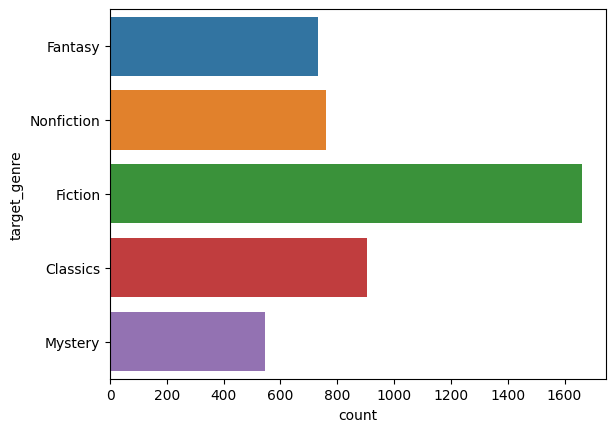

In [595]:
descriptions_20_genres = filter_genres(descriptions, 20)
descriptions_5_genres = filter_genres(descriptions, 5)

descriptions_tidf_20_genres = filter_genres(descriptions_tidf, 20)
descriptions_tidf_5_genres = filter_genres(descriptions_tidf, 5)

### ML Model, prediction and results function

In [604]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
# Svm parameters: kernel, gamma, regularization
# Svm It works poorly with overlapping classes and is also sensitive to the type of kernel used.

def machine_learning(df, model_type):
    # X y split
    X = df.drop(columns='target_genre')
    y = df['target_genre']

    # Train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

    # Model training
    model = model_type()
    model.fit(X_train, y_train)
    
    # Prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Printing out the performance metrics of the model that has been passed.
    performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_train_pred),
                                         precision_score(y_train, y_train_pred, average='macro'),
                                         recall_score(y_train, y_train_pred, average='macro')],
                               'Test': [accuracy_score(y_test, y_test_pred),
                                        precision_score(y_test, y_test_pred, average='macro'),
                                        recall_score(y_test, y_test_pred, average='macro')]})
    
    print(model.__class__.__name__ + "\n", performance_log)

In [605]:
machine_learning(descriptions, MultinomialNB)

MultinomialNB
   Error_metric     Train      Test
0     Accuracy  0.794795  0.500498
1    Precision  0.581432  0.193958
2       Recall  0.439846  0.150260


In [553]:
def random_forest(df):
    # X y split
    X = df.drop(columns='target_genre')
    y = df['target_genre']

    # Train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

    rfc_ops = {"max_depth":20,
           "min_samples_leaf":1,
           'min_samples_split': 2,
           "max_features":'sqrt',
           "n_estimators":200,
           "bootstrap":True,
           "oob_score":True,
           "random_state":42}

    clf = RandomForestClassifier(**rfc_ops)

            #max_depth=6,min_samples_leaf=20,max_features=None,n_estimators=100,
            #                    bootstrap=True,oob_score=True, random_state=RAND_STATE)
    clf.fit(X_train, y_train)

    # Train set predictions
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    # Printing out the performance metrics of Random forest
    performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_train_pred),
                                         precision_score(y_train, y_train_pred, average='macro'),
                                         recall_score(y_train, y_train_pred, average='macro')],
                               'Test': [accuracy_score(y_test, y_test_pred),
                                        precision_score(y_test, y_test_pred, average='macro'),
                                        recall_score(y_test, y_test_pred, average='macro')]})

    print("Random forest: "+ "\n", performance_log)

In [554]:
random_forest(descriptions)

Random forest: 
   Error_metric     Train      Test
0     Accuracy  0.446022  0.303785
1    Precision  0.359689  0.099926
2       Recall  0.103791  0.049562


# Target class balancing

## Downsampling

In [175]:
# Function for downsampling

def down_samp_rand(Xin, yin):
        from imblearn.under_sampling import RandomUnderSampler
        """Downsamples majority class using random sampling.
        Ratio argument is the ratio of minority class to the downsampled majority
        """
        rus = RandomUnderSampler(random_state=42)
        X_rus, y_rus = rus.fit_resample(Xin, yin)
        return X_rus, y_rus

In [109]:
# X_train, y_train = down_samp_rand(X_train, y_train)

## Upsampling

In [87]:
'''
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE

# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)

# Apply SMOTE to the training set only
smote = SMOTE(sampling_strategy='minority', k_neighbors=5)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

# Convert the resampled data back to a pandas dataframe
X_train_resampled_df = pd.DataFrame(X_train_resampled.toarray(), columns=vectorizer.get_feature_names())
y_train_resampled_df = pd.DataFrame(y_train_resampled, columns=['target_variable'])
train_resampled_data = pd.concat([X_train_resampled_df, y_train_resampled_df], axis=1)

# Print the class distribution before and after SMOTE
print("Class distribution before SMOTE: ", y_train.value_counts())
print("Class distribution after SMOTE: ", y_train_resampled_df['target_variable'].value_counts())
'''

'\nfrom sklearn.feature_extraction.text import TfidfVectorizer\nfrom imblearn.over_sampling import SMOTE\n\n# Vectorize the text using TF-IDF\nvectorizer = TfidfVectorizer()\nX_train_vec = vectorizer.fit_transform(X_train)\n\n# Apply SMOTE to the training set only\nsmote = SMOTE(sampling_strategy=\'minority\', k_neighbors=5)\nX_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)\n\n# Convert the resampled data back to a pandas dataframe\nX_train_resampled_df = pd.DataFrame(X_train_resampled.toarray(), columns=vectorizer.get_feature_names())\ny_train_resampled_df = pd.DataFrame(y_train_resampled, columns=[\'target_variable\'])\ntrain_resampled_data = pd.concat([X_train_resampled_df, y_train_resampled_df], axis=1)\n\n# Print the class distribution before and after SMOTE\nprint("Class distribution before SMOTE: ", y_train.value_counts())\nprint("Class distribution after SMOTE: ", y_train_resampled_df[\'target_variable\'].value_counts())\n'

# Naive Bayes Classification

### Initializing the model to a variable.

### Hyper paramater tuning

In [270]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score

def hyper_forest(X_train, y_train, X_test, y_test):
    param_grid = {
        'n_estimators': [50,100,200],
        'min_samples_split': [2, 4],
        'min_samples_leaf' : [1, 2],
        'max_features': ['sqrt']
        ##'max_samples' : ['None', 0.5],
        ##'max_depth':[3,5,10],
        ## 'bootstrap':[True,False]
        }
    clf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(clf, param_grid, cv=5,return_train_score=True,n_jobs=-1)
    grid_search.fit(X_train,y_train)
    best_params = grid_search.best_params_ #To check the best set of parameters returned
    best_score = grid_search.best_score_
    # Create a Complement Naive Bayes classifier with the best parameters
    clf_best = RandomForestClassifier(**best_params
                   #penalty=best_params['penalty'],loss=best_params['loss']
                  )
    # Fit the classifier to the training data
    clf_best.fit(X_train, y_train)
    # Make predictions on the test data
    y_test_pred = clf_best.predict(X_test)
    y_train_pred=clf_best.predict(X_train)
    # Compute accuracy on the test data
    accuracy = accuracy_score(y_test, y_test_pred)
    # Print the best parameters and score
    print("Best parameters:", best_params)
    print("Best score:", best_score)
    return y_test_pred, y_train_pred, clf_best

In [271]:
# hyper_forest(X_train, y_train, X_test, y_test)
# Best score: 0.4808935666958617

In [272]:
'''

# Trying best parameter for random forest

rfc_ops = {"max_depth":20,
           "min_samples_leaf":1,
           'min_samples_split': 2,
           "max_features":'sqrt',
           "n_estimators":200,
           "bootstrap":True,
           "oob_score":True,
           "random_state":42}

clf = RandomForestClassifier(**rfc_ops)

        #max_depth=6,min_samples_leaf=20,max_features=None,n_estimators=100,
         #                    bootstrap=True,oob_score=True, random_state=RAND_STATE)
clf.fit(X_train, y_train)

# Train set predictions
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

'''

'\n\n# Trying best parameter for random forest\n\nrfc_ops = {"max_depth":20,\n           "min_samples_leaf":1,\n           \'min_samples_split\': 2,\n           "max_features":\'sqrt\',\n           "n_estimators":200,\n           "bootstrap":True,\n           "oob_score":True,\n           "random_state":42}\n\nclf = RandomForestClassifier(**rfc_ops)\n\n        #max_depth=6,min_samples_leaf=20,max_features=None,n_estimators=100,\n         #                    bootstrap=True,oob_score=True, random_state=RAND_STATE)\nclf.fit(X_train, y_train)\n\n# Train set predictions\ny_train_pred = clf.predict(X_train)\ny_test_pred = clf.predict(X_test)\n\n'

### Performance metrics

In [273]:
'''
from sklearn.metrics import accuracy_score, precision_score, recall_score

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_train_pred),
                                         precision_score(y_train, y_train_pred, average='macro'),
                                         recall_score(y_train, y_train_pred, average='macro')],
                               'Test': [accuracy_score(y_test, y_test_pred),
                                        precision_score(y_test, y_test_pred, average='macro'),
                                        recall_score(y_test, y_test_pred, average='macro')]})

performance_log
'''

,Error_metric,Train,Test
0,Accuracy,0.795310,0.575155
1,Precision,0.833945,0.602727
2,Recall,0.797140,0.483077


### Classification Report

In [220]:
'''
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))
'''

                    precision    recall  f1-score   support

         Biography       0.31      0.25      0.28        32
         Childrens       0.32      0.25      0.28        36
          Classics       0.49      0.58      0.53       216
            Comics       0.00      0.00      0.00        21
           Fantasy       0.61      0.77      0.68       146
           Fiction       0.42      0.67      0.51       318
Historical Fiction       0.60      0.44      0.51        55
           History       0.76      0.51      0.62       101
            Horror       0.50      0.27      0.35        33
             Manga       0.64      0.25      0.36        36
           Mystery       0.61      0.70      0.66       107
        Nonfiction       0.65      0.49      0.56       138
        Philosophy       0.62      0.64      0.63        76
     Picture Books       0.43      0.11      0.18        27
            Poetry       0.56      0.24      0.33        42
           Romance       0.56      0.39

In [221]:
'''
xtest123 = X_test[0:10]
ytest123 = y_test[0:10]

# Predict Output
predicted = model.predict(xtest123)

print("Actual Value:", ytest123)
print("Predicted Value:", predicted[0:10])
'''

Actual Value: 1421               Fantasy
2794               Fiction
4017    Historical Fiction
1727         Short Stories
4011         Picture Books
1434           Young Adult
2813                Horror
3859               Fantasy
7727              Classics
9356              Classics
Name: target_genre, dtype: object
Predicted Value: ['Fantasy' 'Fiction' 'Historical Fiction' 'Nonfiction' 'Fiction' 'Fiction'
 'Horror' 'Fantasy' 'Classics' 'Classics']
